In [1]:
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

import nltk
from eunjeon import Mecab

fm.findSystemFonts()
plt.rcParams['font.family']= ["Malgun Gothic"]
plt.rcParams["axes.unicode_minus"]=False

In [2]:
data = pd.read_csv('./data/train_data_1.csv', encoding='utf-8-sig')
data.head()

,review
0,맛있어요~
1,만족도 최상의 커피맛집
2,찐 커피맛집ㅎㅎ
3,로마노 진짜 달달하고 맛있고 아이스크림라떼도 꼬소하고 달달하고 진짜 맛있어요!! 마...
4,커조남 커피는 힐링입니다 소금빵도 맛있어요


In [5]:
mecab = Mecab()

reviews = ' '.join(data['review'].explode()) 
review_morphs = mecab.morphs(reviews)
review_nouns = mecab.nouns(reviews)

In [6]:
print('형태소 개수:', len(review_morphs))
print(review_morphs[:10])
print()
print('명사 개수:', len(review_nouns))
print(review_nouns[:10])

형태소 개수: 7739
['맛있', '어요', '~', '만족', '도', '최상', '의', '커피', '맛집', '찐']

명사 개수: 2336
['만족', '최상', '커피', '맛집', '커피', '맛집', '로마노', '아이스크림', '라떼', '마리']


In [8]:
nltk_review_morphs = nltk.Text(review_morphs)
nltk_review_nouns = nltk.Text(review_nouns)

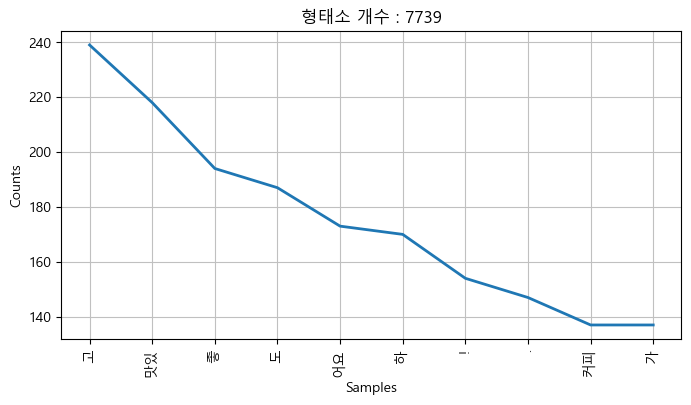

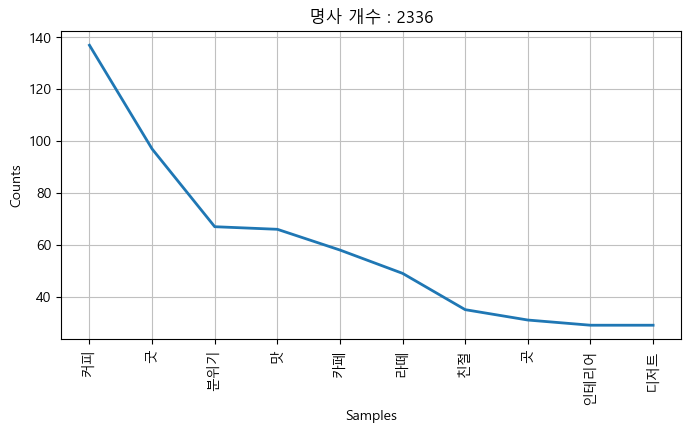

In [10]:
plt.figure(figsize=(8,4))
plt.title("형태소 개수 : " + str(len(nltk_review_morphs.tokens)))
nltk_review_morphs.plot(10)

plt.figure(figsize=(8,4))
plt.title("명사 개수 : " + str(len(nltk_review_nouns.tokens)))
nltk_review_nouns.plot(10)

plt.show()

In [ ]:
"""
train data는 몇 개 필요할까 . . .

1. 명사 추출: 키워드 분석
    - 가격(price), 음료, 디저트, 서비스, 매장 넓이, 분위기 등등...
    - (참고) 1기의 경우 태깅 위주였기 때문에 [커피, 음료, 디저트, 분위기, 유아동반, 애견동반, 카공] 으로 나눔
2. 문장 단위로 나눠서 감성 분석 후 키워드 분석
    - 문장 단위: 문장 부호, 종결어미, 연결조사로 사전 만들기 (**오타의 경우 어떻게 처리할 것인지)
    - 긍부정 분석
3. 서비스 제공
    - 긍부정 비율 시각화
    - 강점, 약점 분석
"""